Distinguishing word clouds from speeches made during the 2011 Canadian federal election. There is one speech from each leader, taken from

http://www.macleans.ca/news/canada/the-best-speeches-from-the-campaign-trail/

In [1]:
import twitter
import re
import os
import wordcloud
import datetime
from scipy.misc import imread, imfilter
from pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [2]:
font_path = 'Verdana.ttf'
rcParams['figure.figsize'] = 20, 40

In [3]:
import string

def clean_text(s):
    s = filter(lambda x: x in string.printable, s)
    s = s.replace('Quebecers', 'Quebec')
    s = s.replace('Qubcois', 'Quebec')
    return s

In [4]:
speech = dict()
for party in ['NDP', 'CPC', 'Lib']:
    with open('speech_%s.txt' % party) as f:
        speech[party] = clean_text(''.join(f.readlines()))

In [5]:
data = []
target = []
target_names = []
for n, (key, val) in enumerate(speech.items()):
    data += [val]
    target += [n]
    target_names += [key]

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline((
    ('vec', TfidfVectorizer(min_df=1, max_df=0.8, use_idf=True)),
    ('clf', PassiveAggressiveClassifier(C=1)),
))

In [7]:
_ = pipeline.fit(data, target)
vec_name, vec = pipeline.steps[0]
clf_name, clf = pipeline.steps[1]
feature_names = vec.get_feature_names()
feature_weights = clf.coef_

In [8]:
def important_words(target_idx, n_top=50):
    weights = feature_weights
    target_name = target_names[target_idx]
    sorted_features_indices = weights[target_idx].argsort()[::-1]
    most_important = sorted_features_indices[:n_top]
    return [(feature_names[j], weights[target_idx,j]) for j in most_important]

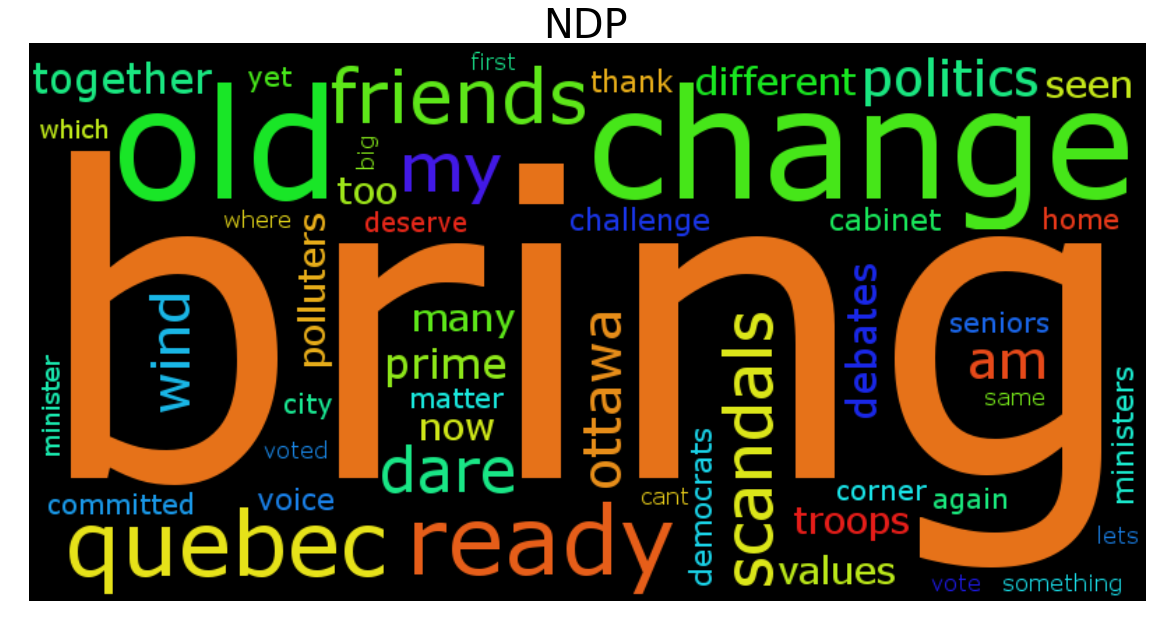

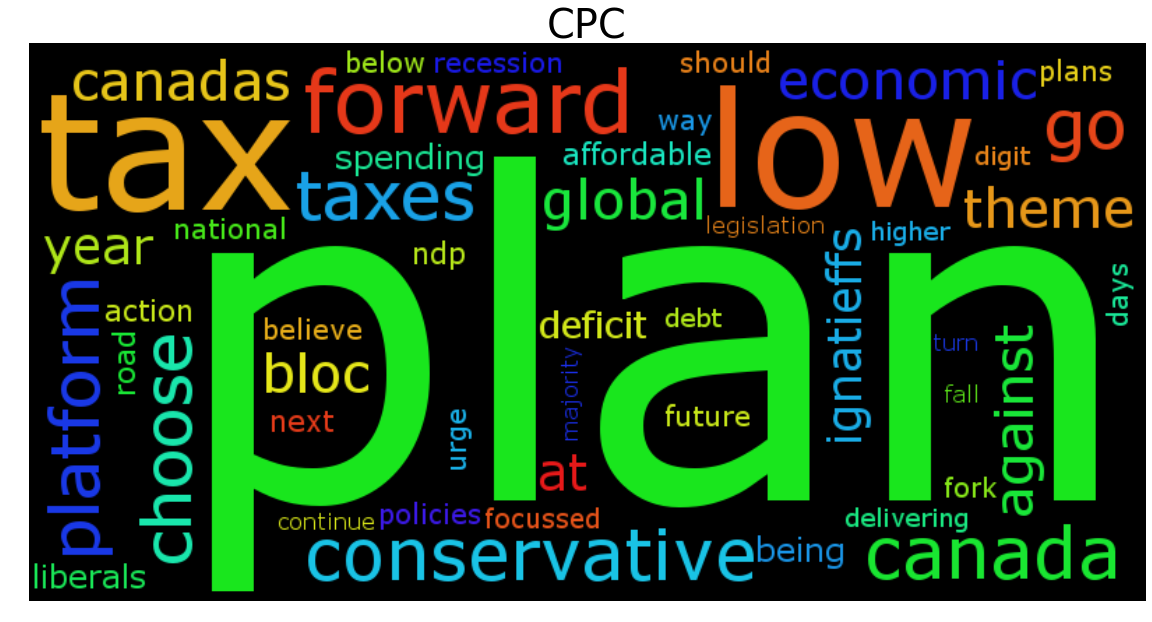

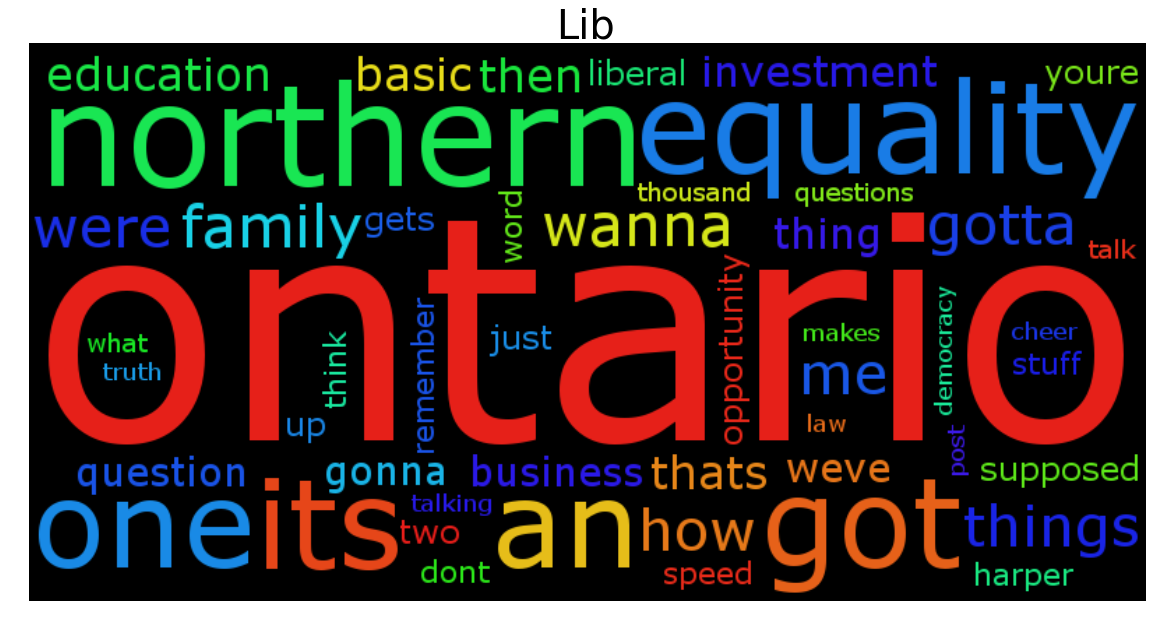

In [9]:
wc = wordcloud.WordCloud(width=800, height=400, font_path=font_path)
for i in range(len(target_names)):
    wc.generate_from_frequencies(important_words(i))
    plt.imshow(wc)
    plt.axis('off')
    plt.title(target_names[i], fontsize=40)
    plt.show()